<img src="https://miro.medium.com/max/1296/1*kQBj7l-Y1WPZfX9nKIYL1Q.jpeg" width="1200" height="100">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Gathering and Preparation

In [2]:
df  = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
print('Unique_value:', df.Car_Name.nunique())
df["Car_Name"].value_counts()

Unique_value: 98


city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [7]:
r = len(df.columns[1:])//2+ 1*(len(df.columns[1:])%2==1)
c = 2
r,c

(4, 2)

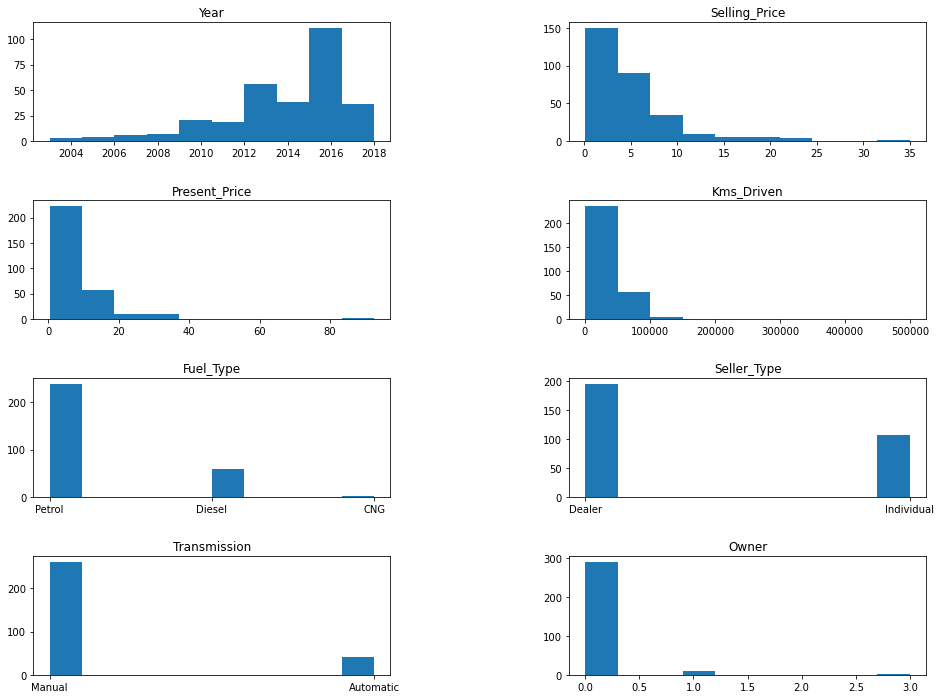

In [8]:
fig, ax = plt.subplots(nrows=r,ncols=c, figsize=(16,12))
fig.subplots_adjust(left=None,    bottom=None,    right=None,    top=None,    wspace=0.5,    hspace=0.5)

for i,col in enumerate(df.columns[1:]):
    ax[i//2,i%2].hist(df[col])
    ax[i//2,i%2].set_title(col)

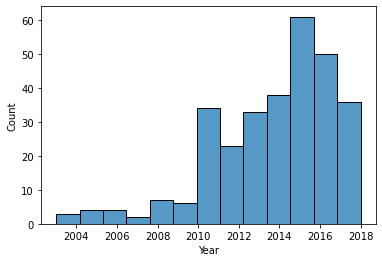

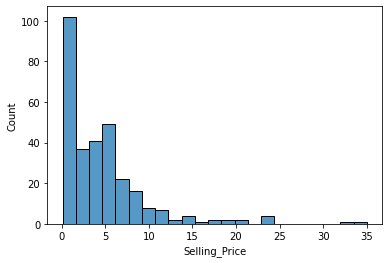

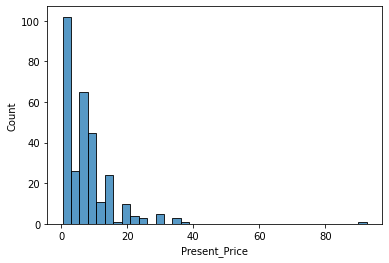

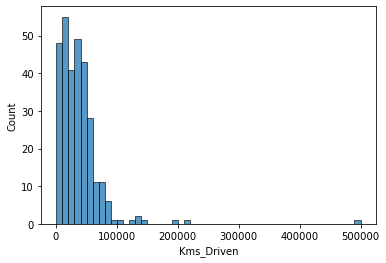

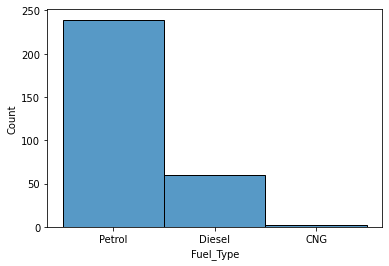

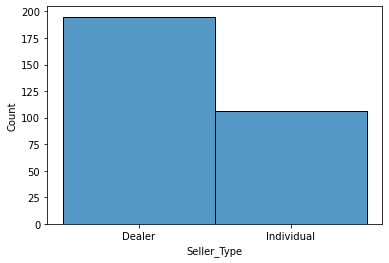

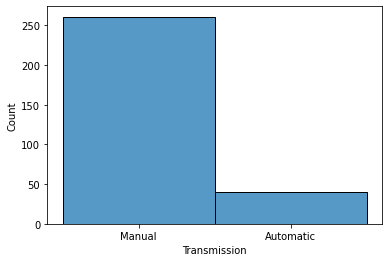

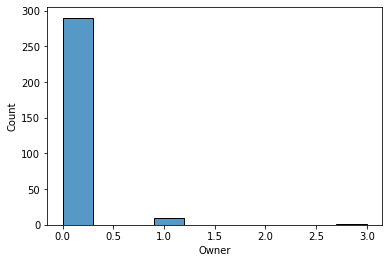

In [9]:
for i,col in enumerate(df.columns[1:]):
    plt.figure(i)
    sns.histplot(df[col])

In [10]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [11]:
plt.rcParams["figure.figsize"] = (9,5)

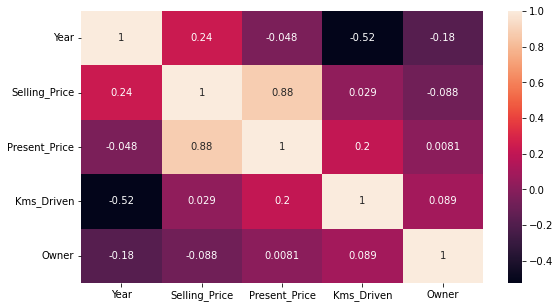

In [12]:
sns.heatmap(df.corr(), annot=True);

In [13]:
cols = list(df.iloc[:,1:].select_dtypes(include="object").columns)
# df.info()

In [14]:
# df[(df.Selling_Price < df.Present_Price)].shape

In [15]:
df = pd.get_dummies(df,columns=["Fuel_Type","Seller_Type","Transmission"], drop_first=True)

In [16]:
df["car_age"] = 2018-df["Year"]

In [17]:
df.drop(["Car_Name","Year"],axis=1,inplace=True)

In [18]:
df.shape

(301, 9)

In [19]:
df.sample(10)

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,car_age
181,0.30,0.48,50000,0,0,1,1,1,2
62,18.75,35.96,78000,0,1,0,0,0,4
199,0.12,0.58,53000,0,0,1,1,1,11
160,0.45,0.95,24000,0,0,1,1,1,7
103,1.45,1.60,1200,0,0,1,1,1,1
201,3.25,6.79,58000,1,1,0,0,1,8
155,0.48,0.51,4300,0,0,1,1,0,1
108,1.20,1.50,18000,0,0,1,1,1,2
17,7.75,10.79,43000,0,1,0,0,1,2
66,19.75,23.15,11000,0,0,1,0,0,1


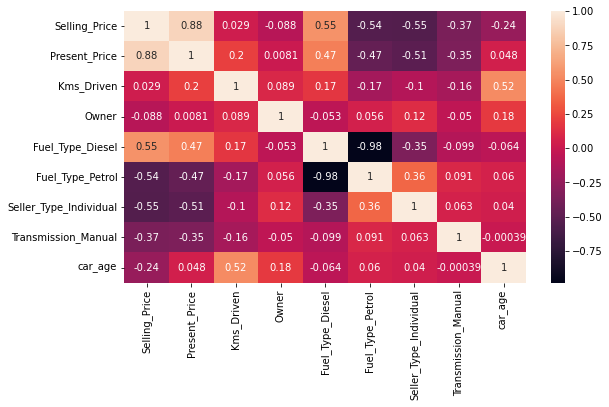

In [20]:
sns.heatmap(df.corr(), annot=True);

In [21]:
#sns.pairplot(df);

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [22]:
X = df.drop(["Selling_Price"],axis=1)
y = df["Selling_Price"]


### Splitting data into training and testing

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)


In [25]:
# X_train,X_test,y_train,y_test
X_train.shape

(210, 8)

##  Model Building (Linear Regression)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
lr_model = LinearRegression()  
lr_model.fit(X_train_scaled,y_train)

print("R2_train:", lr_model.score(X_train_scaled,y_train), "\nR2_test:", lr_model.score(X_test_scaled,y_test))

R2_train: 0.8828030918602584 
R2_test: 0.8756155246204997


# Interpret the model

In [29]:
pd.DataFrame(lr_model.coef_,X_train.columns, columns=["Coefs_"])

,Coefs_
Present_Price,38.418266
Kms_Driven,-2.216323
Owner,-3.090828
Fuel_Type_Diesel,2.711830
Fuel_Type_Petrol,0.717353
Seller_Type_Individual,-1.152096
Transmission_Manual,-1.438359
car_age,-4.981702


In [30]:
# for k,v in dict(zip(X_train.columns, lr_model.coef_)).items():
#     print(f"{k:<20}","\t",f"{v:.3f}")

# Model Evaluation

In [31]:
y_pred = lr_model.predict(X_test_scaled)

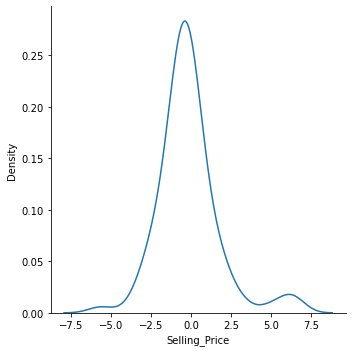

In [32]:
residuals = y_test-y_pred
sns.displot(residuals, kind="kde");

In [33]:
f"{len(residuals[residuals>0])} low + {len(residuals[residuals<0])} high = {len(X_test)}"

'36 low + 55 high = 91'

In [34]:
# y_pred = lr_model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,"residuals":residuals})
results.sort_values(by="residuals",ascending=False)

,Actual,Predicted,residuals
97,17.00,10.489607,6.510393
82,23.00,16.709244,6.290756
66,19.75,13.798434,5.951566
93,23.00,18.063388,4.936612
63,23.50,20.263282,3.236718
...,...,...,...
77,1.50,4.118080,-2.618080
173,0.40,3.248484,-2.848484
57,4.75,7.773805,-3.023805
90,3.80,7.393914,-3.593914


In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [36]:
def eval_model(y_test,y_pred):
    rmse=(mean_squared_error(y_test,y_pred)**.5)
    mae=mean_absolute_error(y_test,y_pred)
    R2_score=r2_score(y_test,y_pred)
    print(f"rmse:\t\t{rmse }")
    print(f"mae:\t\t{mae }")
    print(f"R2_score:\t{R2_score }")
    return R2_score

In [37]:
eval_model(y_test,y_pred), "train R2: ",lr_model.score(X_train_scaled, y_train),"test R2: ",lr_model.score(X_test_scaled, y_test)

rmse:		1.8819533737447378
mae:		1.2698356709065521
R2_score:	0.8756155246204997


(0.8756155246204997,
 'train R2: ',
 0.8828030918602584,
 'test R2: ',
 0.8756155246204997)

In [38]:
# plt.scatter([10,20,30],[1,2,3])

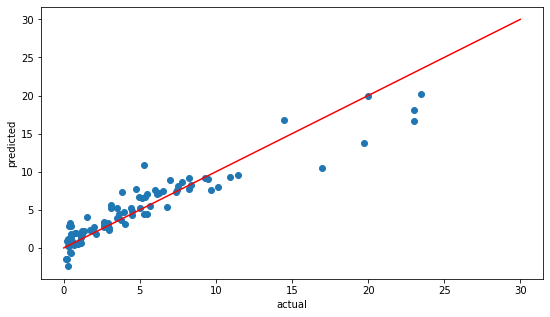

In [39]:
plt.scatter(y_test,y_pred,)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot([0,30],[0,30],"r");

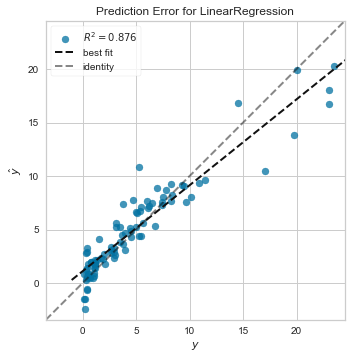

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [40]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lr_model= LinearRegression()
visualizer = PredictionError(lr_model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show() 

# Regularization

# Ridge

In [41]:
from sklearn.linear_model import Ridge, RidgeCV

In [42]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled,y_train)

Ridge()

In [43]:
ridge_model.score(X_train_scaled,y_train),ridge_model.score(X_test_scaled,y_test)

(0.8116827427357444, 0.8016315981221224)

In [44]:
y_pred = ridge_model.predict(X_test_scaled)

In [45]:
eval_model(y_test,y_pred)

rmse:		2.376632420828545
mae:		1.503885736058302
R2_score:	0.8016315981221224


0.8016315981221224

In [46]:
ridge_model.alpha

1.0

In [47]:
ridgecv_model = RidgeCV(alphas=np.linspace(0.2, 10, 100),cv=10 ,scoring='neg_root_mean_squared_error')

ridgecv_model.fit(X_train_scaled,y_train)
y_pred = ridgecv_model.predict(X_test_scaled)
eval_model(y_test,y_pred), "alpha:", ridgecv_model.alpha_, "best score:", ridgecv_model.best_score_

rmse:		1.9978985252835022
mae:		1.3273209242725132
R2_score:	0.8598170120293351


(0.8598170120293351, 'alpha:', 0.2, 'best score:', -1.7416998457306865)

In [48]:
ridgecv_model = RidgeCV(alphas=np.linspace(0.01, 2, 100),cv=10,scoring='neg_root_mean_squared_error')

ridgecv_model.fit(X_train_scaled,y_train)
y_pred = ridgecv_model.predict(X_test_scaled)
eval_model(y_test,y_pred),"alpha:", ridgecv_model.alpha_, "best score:", ridgecv_model.best_score_

rmse:		1.9807765379721793
mae:		1.3192483259657963
R2_score:	0.8622094522932297


(0.8622094522932297,
 'alpha:',
 0.17080808080808083,
 'best score:',
 -1.7363627933267836)

In [49]:
y_train_pred = ridgecv_model.predict(X_train_scaled)
eval_model(y_train,y_train_pred)

rmse:		1.7349356001335794
mae:		1.1745883173042784
R2_score:	0.8773562255349197


0.8773562255349197

In [50]:
ridge_model = Ridge(alpha=ridgecv_model.alpha_)
ridge_model.fit(X_train_scaled,y_train)
y_pred = ridge_model.predict(X_test_scaled)
eval_model(y_test,y_pred)

rmse:		1.9807765379721793
mae:		1.3192483259657963
R2_score:	0.8622094522932297


0.8622094522932297

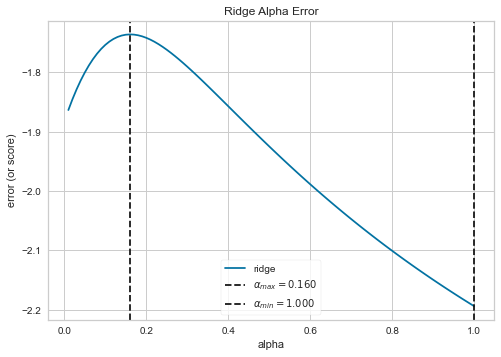

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [51]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
# alpha_space = np.linspace(0.01, 1, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=np.linspace(0.01, 1, 100),
    cv=10,
    scoring='neg_root_mean_squared_error'
)
visualizer.fit(X_train_scaled, y_train)
visualizer.show()

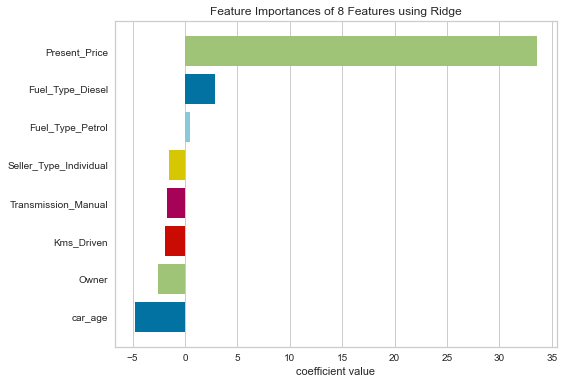

<AxesSubplot:title={'center':'Feature Importances of 8 Features using Ridge'}, xlabel='coefficient value'>

In [52]:
from yellowbrick.model_selection import FeatureImportances

model = Ridge(alpha=ridgecv_model.alpha_)
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

# Lasso

In [53]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [54]:
lasso_model = Lasso().fit(X_train_scaled,y_train)
y_pred = lasso_model.predict(X_test_scaled)
eval_model(y_test,y_pred), lasso_model.score(X_train_scaled,y_train), lasso_model.score(X_test_scaled,y_test)

rmse:		5.000815168732817
mae:		3.3723737721640132
R2_score:	0.12172591880560912


(0.12172591880560912, 0.12631015826497982, 0.12172591880560912)

In [55]:
lasso_model.alpha

1.0

In [56]:
lassocv_model =LassoCV(alphas=np.linspace(0.01,10,100),cv=10).fit(X_train ,y_train)
y_pred = lassocv_model.predict(X_test)

print(eval_model(y_test,y_pred), 
      "\n\nR2_train:",lassocv_model.score(X_train, y_train), 
      "R2_test:",lassocv_model.score(X_test, y_test) ,"alpha:", lassocv_model.alpha_)

rmse:		1.876058542820406
mae:		1.2645082239630228
R2_score:	0.8763935216988661
0.8763935216988661 

R2_train: 0.8824516473556552 R2_test: 0.8763935216988661 alpha: 0.01


In [57]:
lassocv_model =LassoCV(alphas=np.linspace(0.0001,.5,100),cv=10).fit(X_train_scaled ,y_train)
y_pred = lassocv_model.predict(X_test_scaled)

print(eval_model(y_test,y_pred), 
      "\n\nR2_train:",lassocv_model.score(X_train_scaled, y_train), 
      "R2_test:",lassocv_model.score(X_test_scaled, y_test) 
      ,"alpha:", lassocv_model.alpha_)

rmse:		2.0254823845349423
mae:		1.3121365630331667
R2_score:	0.855919435610255
0.855919435610255 

R2_train: 0.8723800011747286 R2_test: 0.855919435610255 alpha: 0.030396969696969697


In [58]:
lasso_model = Lasso(alpha= lassocv_model.alpha_).fit(X_train_scaled,y_train)
y_pred = lasso_model.predict(X_test_scaled)

print(eval_model(y_test,y_pred), 
      "\n\nR2_train:",lasso_model.score(X_train_scaled, y_train), 
      "R2_test:",lasso_model.score(X_test_scaled, y_test) ,
      "alpha:", lasso_model.alpha)


rmse:		2.0254823845349423
mae:		1.3121365630331667
R2_score:	0.855919435610255
0.855919435610255 

R2_train: 0.8723800011747286 R2_test: 0.855919435610255 alpha: 0.030396969696969697


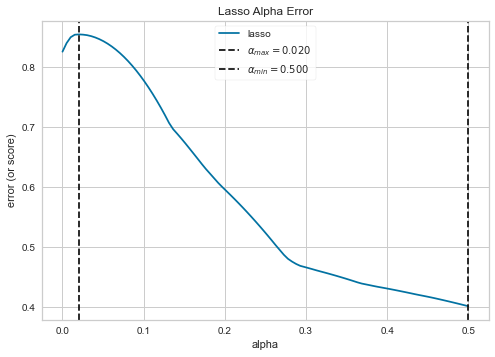

<AxesSubplot:title={'center':'Lasso Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [59]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
# alpha_space = np.linspace(0.01, 1, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Lasso(),
    alphas=np.linspace(0.0001,.5,100),
    cv=10
)
visualizer.fit(X_train_scaled, y_train)
visualizer.show()

## Elastic-Net 

In [60]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [61]:
el_model = ElasticNet().fit(X_train_scaled,y_train)
y_pred = el_model.predict(X_test_scaled)
eval_model(y_test,y_pred)

rmse:		4.838461724749136
mae:		3.241096714433818
R2_score:	0.17782724763828117


0.17782724763828117

In [62]:
el_model.score(X_train_scaled,y_train),el_model.score(X_test_scaled,y_test)

(0.1920513596970821, 0.17782724763828117)

In [63]:
el_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [64]:
elcv_model = ElasticNetCV(alphas = np.linspace(.001,1,100), l1_ratio = [.1, .5, .7, .9, .95, .99, 1]).fit(X_train_scaled,y_train)

y_pred = elcv_model.predict(X_test_scaled)

elcv_model.score(X_train_scaled,y_train),elcv_model.score(X_test_scaled,y_test)

(0.875468515056572, 0.859070042449717)

In [65]:
dir(elcv_model)
# elcv_model

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_estimator',
 '_get_param_names',
 '_get_tags',
 '_is_multitask',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'alpha_',
 'alphas',
 'alphas_',
 'coef_',
 'copy_X',
 'cv',
 'dual_gap_',
 'eps',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'l1_ratio',
 'l1_ratio_',
 'max_iter',
 'mse_path_',
 'n_alphas',
 'n_features_in_',
 'n_iter_',
 'n_jobs',


In [66]:
elcv_model.alpha_, elcv_model.l1_ratio_

(0.011090909090909092, 0.95)

In [67]:
eval_model(y_pred, y_test)

rmse:		2.0032143866713144
mae:		1.321673832961974
R2_score:	0.7889828534224623


0.7889828534224623

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
model = ElasticNet()
params = {"alpha":np.linspace(.001,1,100), "l1_ratio":[.1, .5, .7, .9, .95, .99, 1]}
gr_model = GridSearchCV(model, params)
gr_model.fit(X_train_scaled, y_train)


GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.273...
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]})

In [70]:
y_pred = gr_model.predict(X_test_scaled)
eval_model(y_test,y_pred), "best score:", gr_model.best_score_, "best params:", gr_model.best_params_

rmse:		2.005974472264057
mae:		1.312062147760128
R2_score:	0.8586814203222166


(0.8586814203222166,
 'best score:',
 0.861894481328217,
 'best params:',
 {'alpha': 0.021181818181818184, 'l1_ratio': 0.99})

In [71]:
y_train_pred = gr_model.predict(X_train_scaled)
eval_model(y_train,y_train_pred)

rmse:		1.7570939525183744
mae:		1.150237401648179
R2_score:	0.8742034419140468


0.8742034419140468

### mehmetfatihdata